In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aireal-datasets/Y-Parc_RGB.kml
/kaggle/input/aireal-datasets/EP-00-00012_0342/EP-00-00012_0342/EP-00-00012_0342_0203.JPG
/kaggle/input/aireal-datasets/EP-00-00012_0342/EP-00-00012_0342/EP-00-00012_0342_0002.JPG
/kaggle/input/aireal-datasets/EP-00-00012_0342/EP-00-00012_0342/EP-00-00012_0342_0010.JPG
/kaggle/input/aireal-datasets/EP-00-00012_0342/EP-00-00012_0342/EP-00-00012_0342_0171.JPG
/kaggle/input/aireal-datasets/EP-00-00012_0342/EP-00-00012_0342/EP-00-00012_0342_0128.JPG
/kaggle/input/aireal-datasets/EP-00-00012_0342/EP-00-00012_0342/EP-00-00012_0342_0131.JPG
/kaggle/input/aireal-datasets/EP-00-00012_0342/EP-00-00012_0342/EP-00-00012_0342_0106.JPG
/kaggle/input/aireal-datasets/EP-00-00012_0342/EP-00-00012_0342/EP-00-00012_0342_0064.JPG
/kaggle/input/aireal-datasets/EP-00-00012_0342/EP-00-00012_0342/EP-00-00012_0342_0023.JPG
/kaggle/input/aireal-datasets/EP-00-00012_0342/EP-00-00012_0342/EP-00-00012_0342_0118.JPG
/kaggle/input/aireal-datasets/EP-00-00012_0342/EP-00-00

In [2]:
import os
list = os.listdir('../input/aireal-datasets/EP-00-00012_0342/EP-00-00012_0342')


TypeError: Image data of dtype object cannot be converted to float

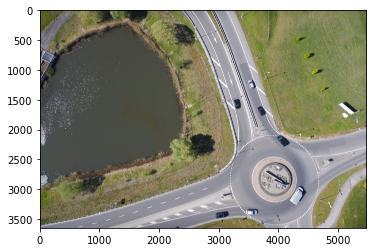

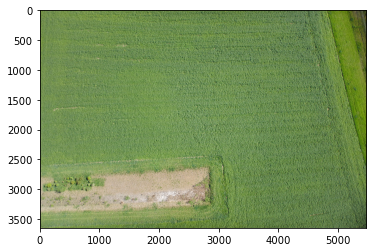

Error in callback <function flush_figures at 0x7f965d9b6440> (for post_execute):


KeyboardInterrupt: 

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def process(filename):
    image = mpimg.imread('../input/aireal-datasets/EP-00-00012_0342/EP-00-00012_0342/'+filename)
    plt.figure()
    plt.imshow(image)

for file in list:
    process(file)

In [3]:
from bs4 import BeautifulSoup

inputfile = "../input/aireal-datasets/Y-Parc_RGB.kml"
with open(inputfile, 'r') as f:
  soup = BeautifulSoup(f)

  for node in soup.find_all('description'):
    for item in node.find_all('td'):
      print(item.string)



In [4]:
!pip install pykml

     |████████████████████████████████| 41 kB 59 kB/s  eta 0:00:011
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
from pykml import parser
import pandas as pd

filename='../input/aireal-datasets/Y-Parc_RGB.kml'
with open(filename) as f:
    folder = parser.parse(f).getroot().Document.Folder

plnm=[]
cordi=[]
for pm in folder.Placemark:
    plnm1=pm.name
    plcs1=pm.Point.coordinates
    plnm.append(plnm1.text)
    cordi.append(plcs1.text)
    
db1=pd.DataFrame()
db1['place_name']=plnm
db1['cordinates']=cordi

def dump(obj):
    for attr in dir(obj):
        if hasattr( obj, attr ):
            print( "obj.%s = %s" % (attr, getattr(obj, attr)))
            
db1['Longitude'], db1['Latitude'],db1['value'] = zip(*db1['cordinates'].apply(lambda x: x.split(',', 2)))

db1

,place_name,cordinates,Longitude,Latitude,value
0,EP-00-00012_0342_0001.JPG,"6.64498157,46.76657610,555.896",6.64498157,46.76657610,555.896
1,EP-00-00012_0342_0002.JPG,"6.64467542,46.76641938,555.532",6.64467542,46.76641938,555.532
2,EP-00-00012_0342_0003.JPG,"6.64430409,46.76631899,552.749",6.64430409,46.76631899,552.749
3,EP-00-00012_0342_0004.JPG,"6.64361878,46.76598917,550.468",6.64361878,46.76598917,550.468
4,EP-00-00012_0342_0005.JPG,"6.64304185,46.76573369,551.498",6.64304185,46.76573369,551.498
...,...,...,...,...,...
230,EP-00-00012_0342_0231.JPG,"6.64508061,46.76217094,558.376",6.64508061,46.76217094,558.376
231,EP-00-00012_0342_0232.JPG,"6.64540617,46.76229551,560.012",6.64540617,46.76229551,560.012
232,EP-00-00012_0342_0233.JPG,"6.64569732,46.76246747,552.673",6.64569732,46.76246747,552.673
233,EP-00-00012_0342_0234.JPG,"6.64603229,46.76264463,551.199",6.64603229,46.76264463,551.199


In [4]:
from pykml import parser
import pandas as pd

filename='../input/aireal-datasets/Y-Parc_RGB.kml'
with open(filename) as f:
    folder = parser.parse(f).getroot().Document.Folder

plnm=[]
cordi=[]
for pm in folder.Placemark:
    plnm1=pm.name
    plcs1=pm.Point.coordinates
    plnm.append(plnm1.text)
    cordi.append(plcs1.text)
    
db2=pd.DataFrame()
db2['place_name']=plnm
db2['cordinates']=cordi

def dump(obj):
    for attr in dir(obj):
        if hasattr( obj, attr ):
            print( "obj.%s = %s" % (attr, getattr(obj, attr)))
            
db2['Longitude'], db2['Latitude'],db2['value'] = zip(*db2['cordinates'].apply(lambda x: x.split(',', 2)))

db2

,place_name,cordinates,Longitude,Latitude,value
0,EP-00-00012_0342_0001.JPG,"6.64498157,46.76657610,555.896",6.64498157,46.76657610,555.896
1,EP-00-00012_0342_0002.JPG,"6.64467542,46.76641938,555.532",6.64467542,46.76641938,555.532
2,EP-00-00012_0342_0003.JPG,"6.64430409,46.76631899,552.749",6.64430409,46.76631899,552.749
3,EP-00-00012_0342_0004.JPG,"6.64361878,46.76598917,550.468",6.64361878,46.76598917,550.468
4,EP-00-00012_0342_0005.JPG,"6.64304185,46.76573369,551.498",6.64304185,46.76573369,551.498
...,...,...,...,...,...
230,EP-00-00012_0342_0231.JPG,"6.64508061,46.76217094,558.376",6.64508061,46.76217094,558.376
231,EP-00-00012_0342_0232.JPG,"6.64540617,46.76229551,560.012",6.64540617,46.76229551,560.012
232,EP-00-00012_0342_0233.JPG,"6.64569732,46.76246747,552.673",6.64569732,46.76246747,552.673
233,EP-00-00012_0342_0234.JPG,"6.64603229,46.76264463,551.199",6.64603229,46.76264463,551.199


In [5]:
# Combining two DataFrames into a single one

import pandas as pd

db = pd.concat([db1,db2], axis=0)
db.reset_index(drop=True)

db

,place_name,cordinates,Longitude,Latitude,value
0,EP-00-00012_0342_0001.JPG,"6.64498157,46.76657610,555.896",6.64498157,46.76657610,555.896
1,EP-00-00012_0342_0002.JPG,"6.64467542,46.76641938,555.532",6.64467542,46.76641938,555.532
2,EP-00-00012_0342_0003.JPG,"6.64430409,46.76631899,552.749",6.64430409,46.76631899,552.749
3,EP-00-00012_0342_0004.JPG,"6.64361878,46.76598917,550.468",6.64361878,46.76598917,550.468
4,EP-00-00012_0342_0005.JPG,"6.64304185,46.76573369,551.498",6.64304185,46.76573369,551.498
...,...,...,...,...,...
230,EP-00-00012_0342_0231.JPG,"6.64508061,46.76217094,558.376",6.64508061,46.76217094,558.376
231,EP-00-00012_0342_0232.JPG,"6.64540617,46.76229551,560.012",6.64540617,46.76229551,560.012
232,EP-00-00012_0342_0233.JPG,"6.64569732,46.76246747,552.673",6.64569732,46.76246747,552.673
233,EP-00-00012_0342_0234.JPG,"6.64603229,46.76264463,551.199",6.64603229,46.76264463,551.199


In [8]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.3-py3-none-any.whl size=25850 sha256=cc2c57153d636e99ed78e55632b661d21884cafbb0d565063b701b0b1ceeabec
  Stored in directory: /root/.cache/pip/wheels/fc/9c/6d/1826267c72afa51b564c9c6e0f66abc806879338bc593a2270
Successfully built imutils
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [ ]:
# Overlapping two images and forming a new Combined image

import imutils
import matplotlib.pyplot as plt
import cv2

fg_img = cv2.imread("../input/aireal-datasets/EP-00-00012_0342/EP-00-00012_0342/EP-00-00012_0342_0001.JPG")
bg_img = cv2.imread("../input/aireal-datasets/EP-00-00012_0342/EP-00-00012_0342/EP-00-00012_0342_0002.JPG")

graybg = cv2.cvtColor(bg_img, cv2.COLOR_BGR2GRAY)

h1, w1 = fg_img.shape[:2]
print(h1, w1)

thresh = cv2.threshold(graybg, 225, 255, cv2.THRESH_BINARY)[1]
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=1)
mask2 = mask.copy()
mask2 = cv2.dilate(mask2, None, iterations = 2)
h2, w2 = mask2.shape[:2]
print(h2, w2)

cnts = cv2.findContours(mask2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        pip_h = y 
        pip_w = x
        print(pip_h, pip_w)

        if h2 - pip_h > h1 + 1 and w2 - pip_w > w1 + 1:
                bg_img[pip_h:pip_h+h1,pip_w:pip_w+w1] = fg_img

        plt.imshow(bg_img)

cv2.waitKey(0)

3648 5472
3648 5472
3619 1302
3613 112
3592 4708
3575 5191
3568 5178
3558 5157
3530 3611
3513 2998
3507 3787
3495 2926
3469 3106
3469 2773
3448 1230
3447 1243
3439 2771
3430 4387
3412 2908
3410 2327
3408 2764
3378 2754
3378 382
3367 0
3365 794
3363 2898
3363 14
3356 2897
3353 682
3350 27
3348 2747
3347 83
3345 98
3342 106
3337 133
3332 2892
3322 5263
3318 2745
3289 3116
3289 1964
3288 2736
3286 3244
3281 3262
3281 2003
3274 2032
3270 2878
3267 3246
3259 2733
3258 2080
3242 2143
3233 3831
3229 2726
3226 2215
3218 2286
3210 3308
3206 3318
3206 2339
3204 0
3200 2716
3200 2347
3199 2372
3196 4014
3196 16
3192 3067
3192 2861
3189 3054
3187 1264
3183 3086
3183 3069
3178 3296
3176 3329
3174 2858
3171 3350
3171 2716
3169 3329
3169 3283
3164 5265
3158 3322
3158 3277
3150 3338
3150 2595
3145 3287
3142 3272
3141 2704
3137 3334
3124 2604
3122 3236
3122 3223
3121 280
3111 3232
3097 3232
3090 5329
3083 5354
3081 4816
3078 5343
3076 5336
3073 813
3048 3533
3035 3531
3033 1474
3026 808
3016 807
3012 1

3648 5472
The new combined-image:



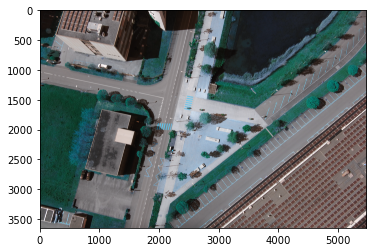

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

fg_img = cv2.imread("../input/aireal-datasets/EP-00-00012_0342/EP-00-00012_0342/EP-00-00012_0342_0001.JPG")
bg_img = cv2.imread("../input/aireal-datasets/EP-00-00012_0342/EP-00-00012_0342/EP-00-00012_0342_0002.JPG")

plt.imshow(fg_img)
plt.imshow(bg_img)

h1, w1 = fg_img.shape[:2]
print (h1, w1)

pip_h = 0
pip_w = 0

bg_img[pip_h:pip_h+h1,pip_w:pip_w+w1] = fg_img
print("The new combined-image:\n")
plt.imshow(bg_img)


(3648, 5472, 3)


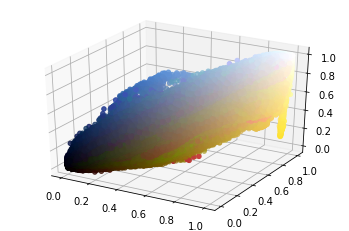

In [7]:
# Analysing the image density of the selected images one-by-one

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

image = plt.imread('../input/aireal-datasets/EP-00-00012_0342/EP-00-00012_0342/EP-00-00012_0342_0001.JPG')
im = image/255.0
print(im.shape)

pixels = im.reshape(im.shape[0]*im.shape[1], im.shape[2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pixels[:,0], pixels[:,1], pixels[:,2], c=pixels)
plt.show() 

(3648, 5472, 3)


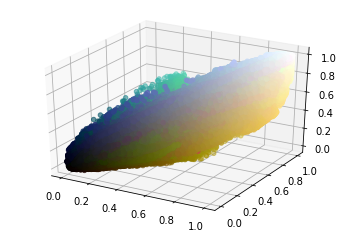

In [8]:
image = plt.imread('../input/aireal-datasets/EP-00-00012_0342/EP-00-00012_0342/EP-00-00012_0342_0002.JPG')
im = image/255.0
print(im.shape)

pixels = im.reshape(im.shape[0]*im.shape[1], im.shape[2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pixels[:,0], pixels[:,1], pixels[:,2], c=pixels)
plt.show() 

In [9]:
!pip install geopandas
!pip install folium

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


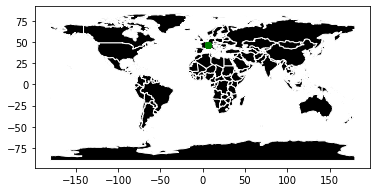

In [12]:
# Tracking location of this village on World Map

import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

gdf = gpd.GeoDataFrame(db, geometry=gpd.points_from_xy(db.Longitude, db.Latitude))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(color='white', edgecolor='black')

gdf.plot(ax=ax, color='blue')

plt.show()